# Project Name: Email Spam Detection using Machine Learning Algorithms

### Submitted by - Hitesh V. Katekhaye
### Branch - Electronics Engg.(EE)
### Sec - A
### Roll No. - 47
### Registration No. - 19010517

## Importing the Libraries:

In [1]:
# Importing the libraries:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset:

In [2]:
data = pd.read_csv('emails.csv')
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


## Modelling:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [8]:
X.shape

(5172, 3000)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60)

#### We will consider using Logistic Regression Algorithm, Naive Bayes Classifier, Suppot Vector Machines and Random Forest Classifier algorithms for the classification task and see which one performs better with its default parameter values.

## Logistic Regression Algorithm:

In [10]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [12]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1104
           1       0.96      0.92      0.94       448

    accuracy                           0.96      1552
   macro avg       0.96      0.95      0.96      1552
weighted avg       0.96      0.96      0.96      1552



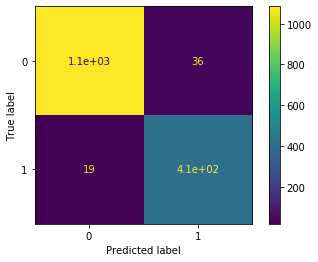

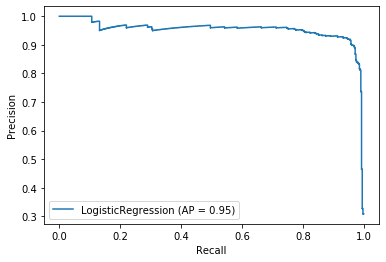

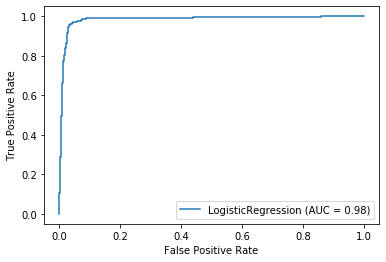

In [13]:
print("LOGISTIC REGRESSION MODEL")
report(lr_model)

## Naive Bayes Classifer:

In [14]:
mnb = MultinomialNB(alpha=1.9)         # alpha by default is 1. alpha must always be > 0. 
# alpha is the '1' in the formula for Laplace Smoothing (P(words))
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,y_test))

Accuracy Score for Naive Bayes :  0.9304123711340206


## Support Vector Machine Algorithm:

In [15]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the inverse of the strength of regularization.
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(X_train,y_train)
y_pred2 = svc.predict(X_test)
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,y_test))

Accuracy Score for SVC :  0.8936855670103093


## Random Forest Classifier Algorithm:

In [17]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on infromation gain('entropy')
rfc.fit(X_train,y_train)
y_pred3 = rfc.predict(X_test)
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred3,y_test))

Accuracy Score of Random Forest Classifier :  0.9652061855670103


## Conclusion: 
### Random Forest Classifier algorithm and Logistic Regression algorithm have almost the same accuracies. But, Decision tree classifiers are excellent classifiers. Random forest is a popular ensemble model that uses a forest of decision trees. So, obviously, combining the accuracy of 100 trees (as n_estimators=100 here), will create a powerful model.